# **Exploratory Data Analysis**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
data = pd.read_csv("train.csv")

# 1. Descriptive Statistics
print(data.describe())





          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

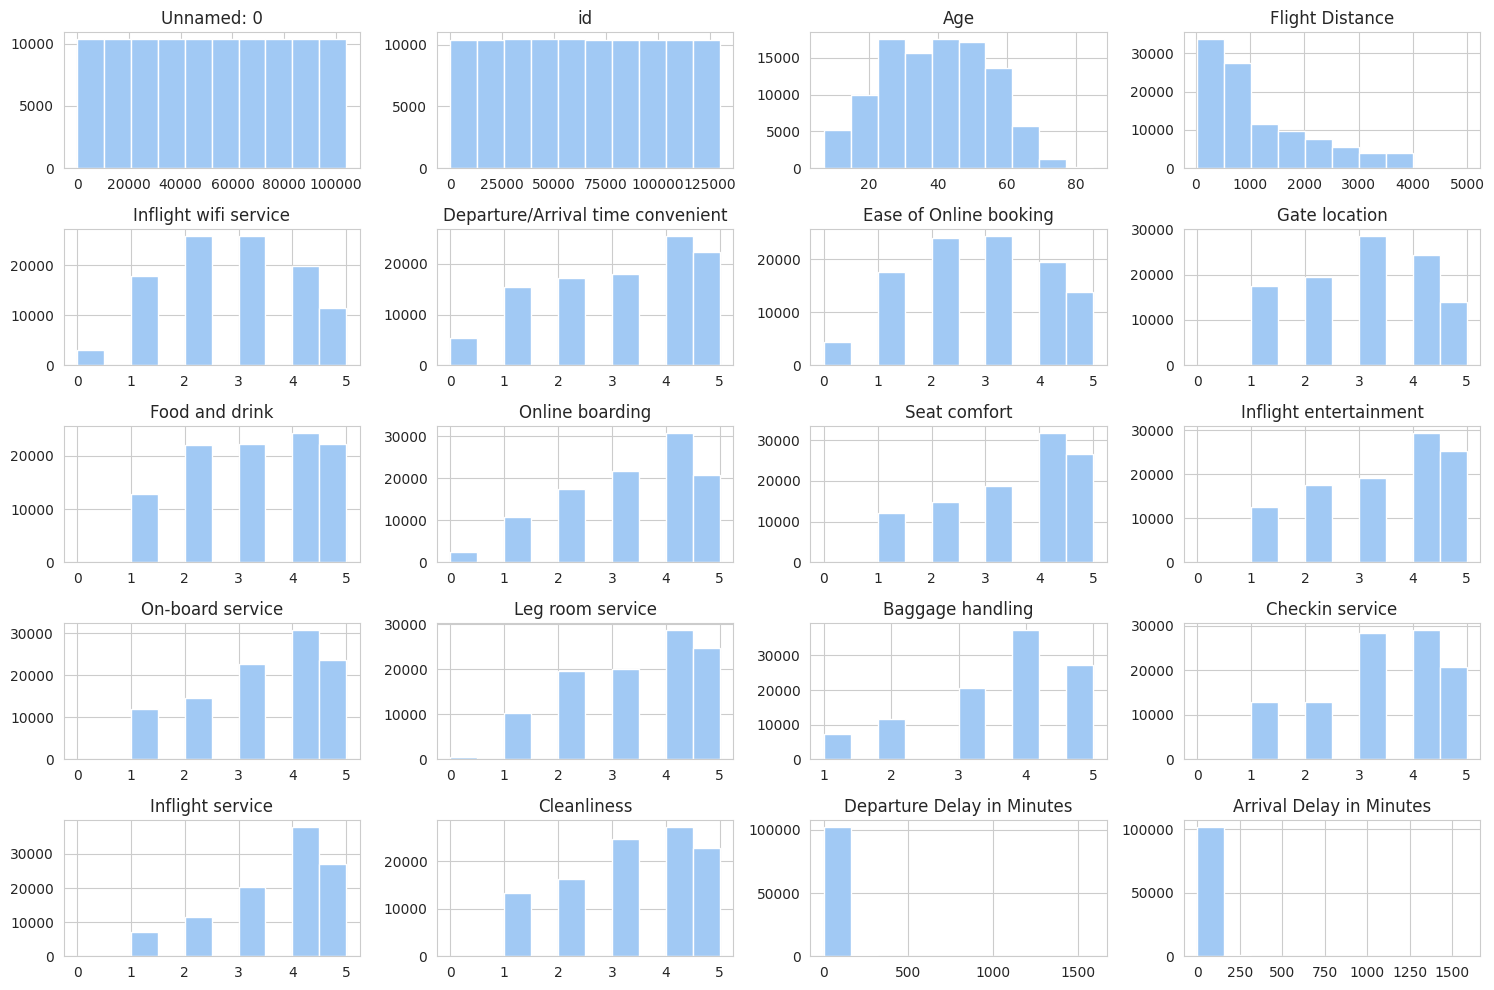

In [86]:
# 2. Data Visualization

# Histograms
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**We can observe the following:**

The "Age" distribution appears roughly normal, with a peak in the middle and tails extending on both sides.

The "Flight Distance" distribution is right-skewed, indicating that most flights are shorter distances, with fewer longer-distance flights.

Satisfaction ratings for different services exhibit varying distributions, with some skewed towards higher ratings and others more evenly spread.

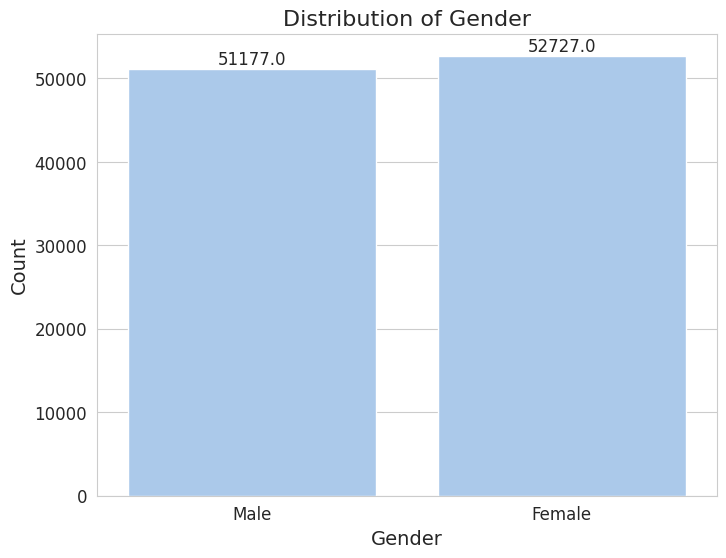

In [87]:
# Customize bar chart appearance
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")  # Set color palette
ax = sns.countplot(x='Gender', data=data)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insights from the bar chart:**

The majority of passengers in the dataset are likely to be female, as indicated by the higher count in the "Female" category compared to "Male".

Understanding the gender distribution is important for analyzing potential variations in passenger satisfaction and preferences across different demographic groups.

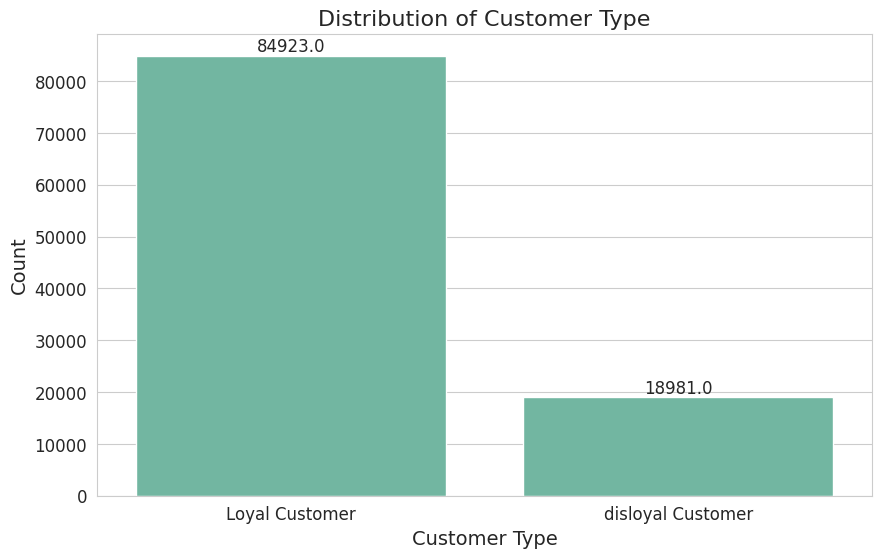

In [88]:
# Customize count plot appearance
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")  # Set color palette
ax = sns.countplot(x='Customer Type', data=data, order=data['Customer Type'].value_counts().index)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insights from the count plot:**

The majority of passengers are likely to be loyal customers, as indicated by the higher count in the "Loyal Customer" category compared to "Disloyal Customer".

Understanding the distribution of customer types is essential for airlines to tailor their services and loyalty programs to meet the needs and preferences of different customer segments.

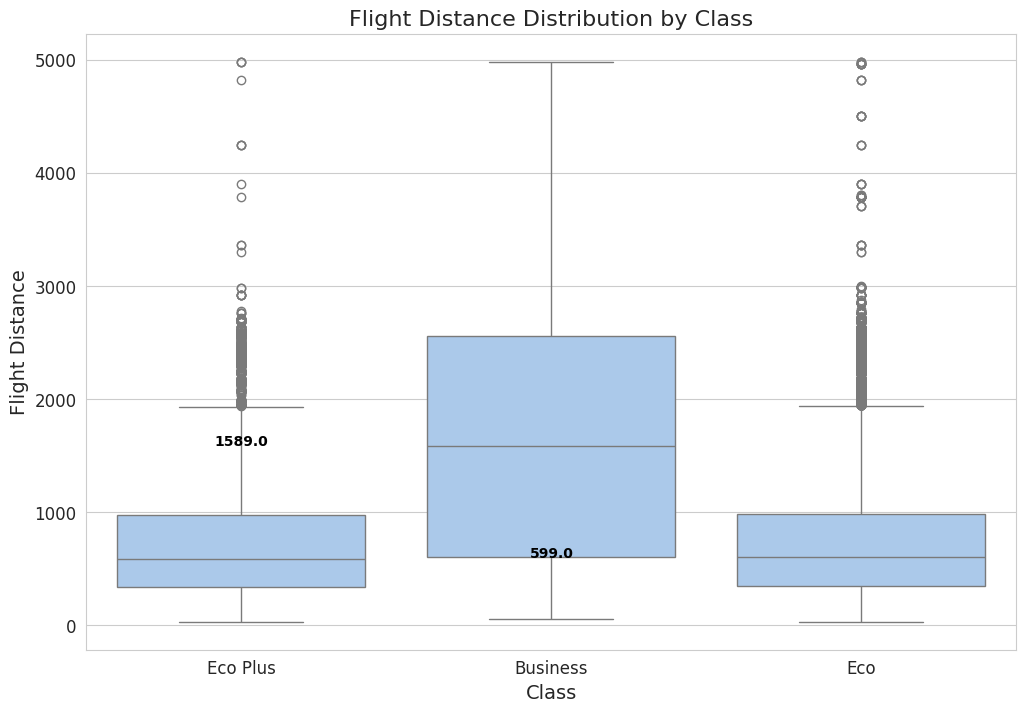

In [89]:
# Customize box plot appearance
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")  # Set color palette
sns.boxplot(x='Class', y='Flight Distance', data=data)

# Add median annotations to the boxes
medians = data.groupby(['Class'])['Flight Distance'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.5, median_labels[tick], horizontalalignment='center', color='black', weight='semibold')

plt.title('Flight Distance Distribution by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Flight Distance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insights from the plot:**

The  plot suggests that most flights fall into the Economy class and tend to travel shorter distances compared to Business and Economy Plus class flights. There are also a  considerebly large number of flights in the Economy Plus class compared to Business class flights.


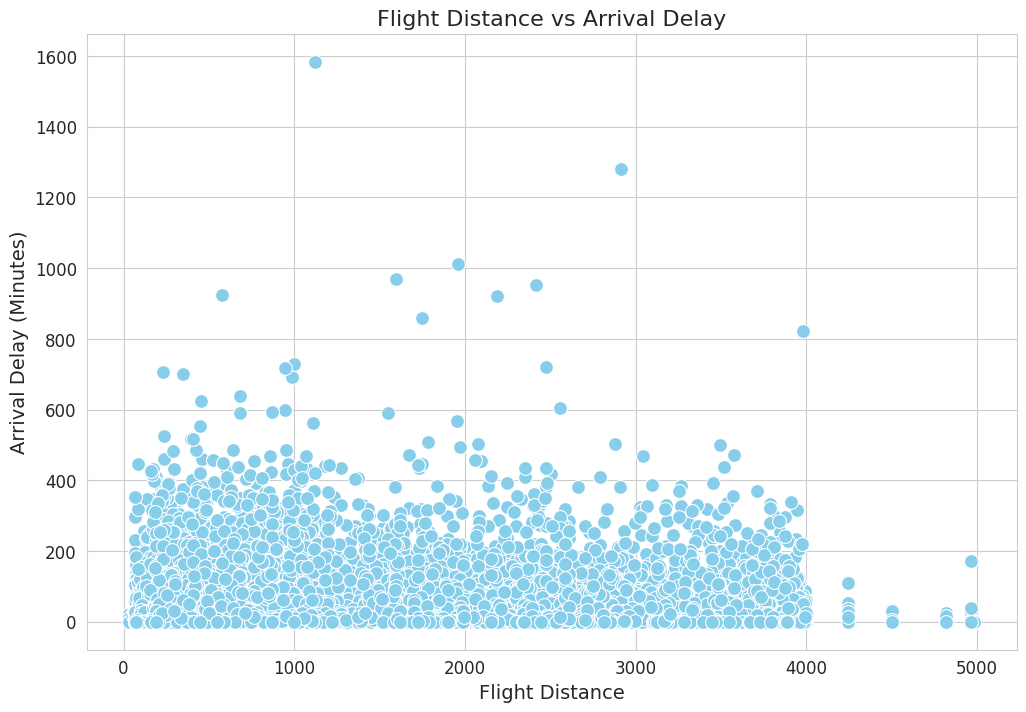

In [90]:
# Customize scatter plot appearance
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Set background style
sns.scatterplot(x='Flight Distance', y='Arrival Delay in Minutes', data=data, color='skyblue', marker='o', s=100)

# Add labels and title
plt.title('Flight Distance vs Arrival Delay', fontsize=16)
plt.xlabel('Flight Distance', fontsize=14)
plt.ylabel('Arrival Delay (Minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


**Insights from the plot**

There is no clear correlation between flight distance and arrival delay according to this graph. Flights can be delayed regardless of how far they travel. There are short flights with long delays and long flights with little to no delay.

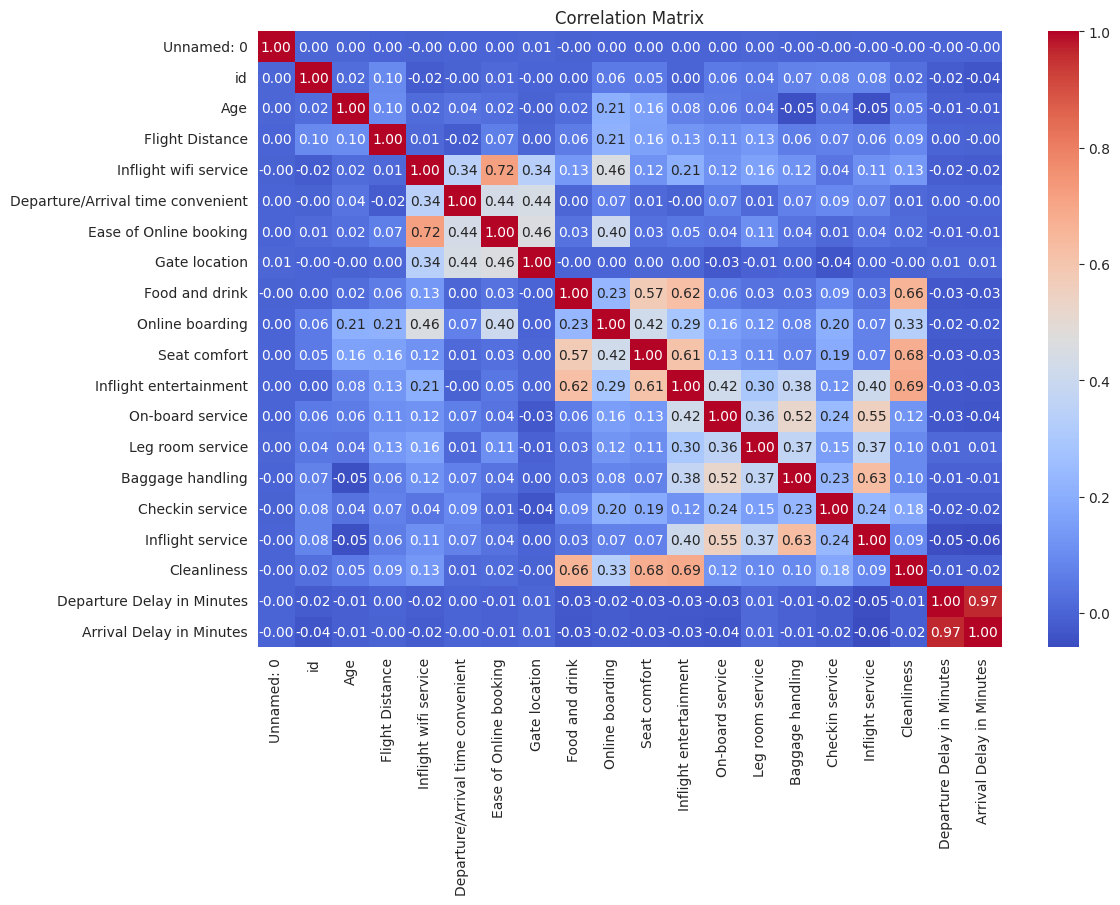

In [91]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = data[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights from the plot:**

**Positive correlations:**

Ease of online booking is positively correlated with Inflight service, Seat comfort, and Cleanliness. This means that if a customer finds it easy to book their flight online, they are also more likely to rate the inflight service, seat comfort, and cleanliness as high.

Departure Delay in Minutes is positively correlated with Arrival Delay in Minutes. This means that flights that depart late are also more likely to arrive late.


<ipython-input-92-ae1c91c8c118>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=data, palette='Set2')


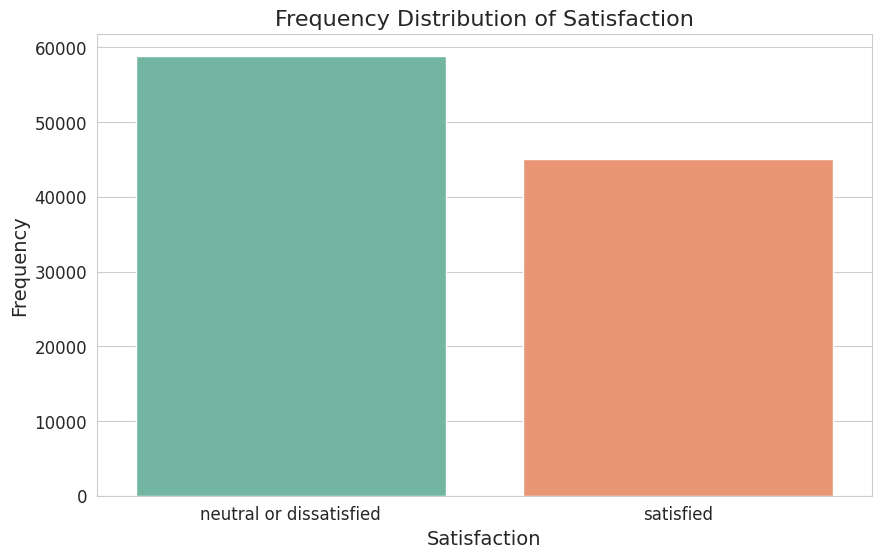

In [92]:
# Customize frequency distribution plot appearance
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set background style
sns.countplot(x='satisfaction', data=data, palette='Set2')

# Add annotations
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Frequency Distribution of Satisfaction', fontsize=16)
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


**Insights from the plot:**

The plot shows that most customers were satisfied with the flight. There are more satisfied customers than neutral or dissatisfied customers.

In [93]:
# Grouping
grouped_data = data.groupby('Class')['satisfaction'].value_counts(normalize=True).unstack()
print(grouped_data)

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                     0.305749   0.694251
Eco                          0.813862   0.186138
Eco Plus                     0.753936   0.246064


**Key observations from the table:**

Business class passengers are significantly more satisfied compared to passengers in Economy and Economy Plus classes. Approximately 69.4% of passengers in Business class reported being satisfied, while only 30.6% expressed neutral or dissatisfied sentiments.

In contrast, passengers in Economy and Economy Plus classes exhibit lower satisfaction levels. The majority of passengers in these classes (around 81.4% for Economy and 75.4% for Economy Plus) reported being neutral or dissatisfied with their experience.

The data suggests that passengers traveling in higher-class accommodations, such as Business class, are more likely to be satisfied with their flight experience compared to those in lower-class accommodations like Economy and Economy Plus.

**Implications:**

Airlines can use this insight to tailor their services and amenities based on the class of travel. For instance, they may focus on enhancing the quality of services in Economy and Economy Plus classes to improve overall passenger satisfaction in these segments.

Marketing strategies and promotional offers could be targeted towards highlighting the premium experience offered in Business class, aiming to attract more passengers to opt for this higher-priced option.
Understanding the satisfaction disparities across different travel classes enables airlines to allocate resources more effectively and prioritize improvements where they are most needed to enhance the overall passenger experience.

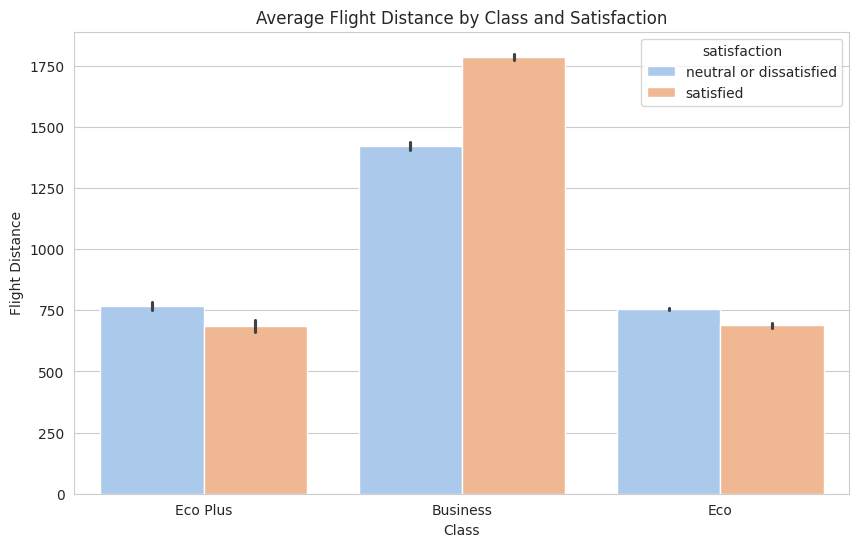

In [94]:
# Comparative Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Flight Distance', hue='satisfaction', data=data)
plt.title('Average Flight Distance by Class and Satisfaction')
plt.show()


**Insights from the plot:**

Passengers who flew economy class traveled the shortest distances on average.

Passengers who flew business class traveled the farthest distances on average.

Economy class passengers seem to be more satisfied than neutral or dissatisfied on average, regardless of the distance traveled.

Business class passengers who traveled the farthest distances also seem to be more satisfied than neutral or dissatisfied on average.

Economy Plus class passengers seem to have similar average flight distances compared to Business class, but their satisfaction levels are lower.

# ***IMPLEMENTED MODELS***

# **Random Forest**

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load train and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Encode categorical variables
label_encoder = LabelEncoder()

# Ensure consistent label encoding across train and test data
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    unique_values = pd.concat([train_data[column], test_data[column]]).unique()
    label_encoder.fit(unique_values)
    train_data[column] = label_encoder.transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Split train data into features and target variable
X_train = train_data.drop(columns=['id', 'satisfaction'])
y_train = train_data['satisfaction']

# Split test data into features and target variable
X_test = test_data.drop(columns=['id', 'satisfaction'])
y_test = test_data['satisfaction']

# Impute missing values in both train and test data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9627348321527563
Precision: 0.9726424494972371
Recall: 0.941594317284925
F1 Score: 0.9568665894305322
Confusion Matrix:
 [[14271   302]
 [  666 10737]]
ROC AUC Score: 0.9604355309748581


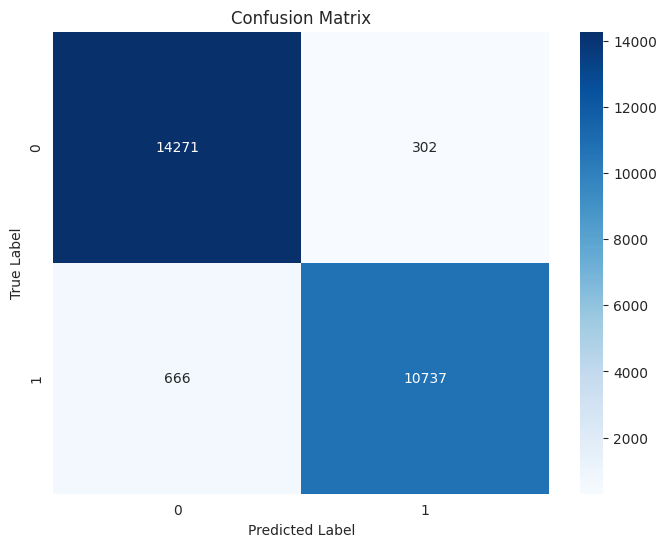

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Compute predictions
y_pred = rf_classifier.predict(X_test_imputed)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('seaborn_plot.png')
plt.show()

ROC AUC Score: 0.9938100718432012


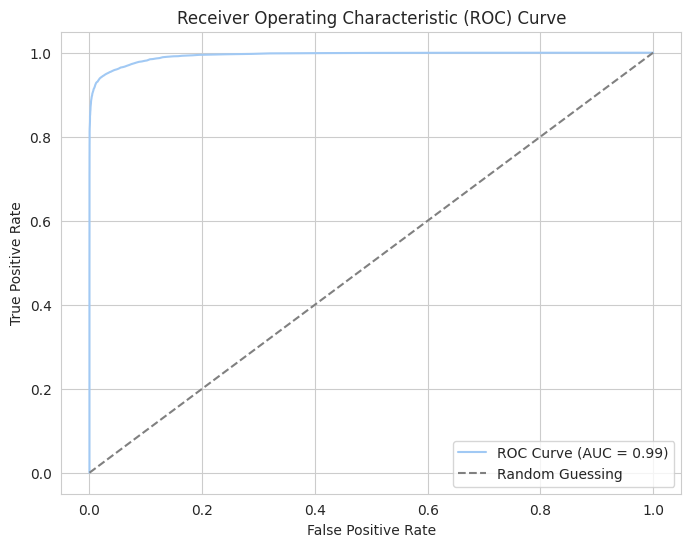

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_pred_proba = rf_classifier.predict_proba(X_test_imputed)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print ROC AUC score
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


In [98]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                              Feature  Importance
12                    Online boarding    0.175021
7               Inflight wifi service    0.128261
4                      Type of Travel    0.104792
5                               Class    0.097459
13                       Seat comfort    0.054995
14             Inflight entertainment    0.042602
2                       Customer Type    0.038692
16                   Leg room service    0.038521
9              Ease of Online booking    0.038181
3                                 Age    0.031704
6                     Flight Distance    0.031313
15                   On-board service    0.029479
20                        Cleanliness    0.027692
19                   Inflight service    0.026750
18                    Checkin service    0.023656
17                   Baggage handling    0.023320
0                          Unnamed: 0    0.019075
8   Departure/Arrival time convenient    0.015281
10                      Gate l

## **Logistic Regression**

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert X_test to a DataFrame and add feature names
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Selecting features explicitly
selected_features = ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class',
                     'Seat comfort', 'Inflight entertainment', 'Customer Type', 'Leg room service',
                     'Ease of Online booking', 'Age', 'Flight Distance']

# Selecting the corresponding columns from X_test_df
X_test_selected = X_test_df[selected_features]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test_selected)

# Initialize and train logistic regression model with scaled data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the test data using the scaled test data
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Display the predictions
predictions_df_logistic = pd.DataFrame({'id': test_data['id'], 'satisfaction': y_pred_logistic})
print(predictions_df_logistic)


          id  satisfaction
0      19556             1
1      90035             1
2      12360             0
3      77959             0
4      36875             0
...      ...           ...
25971  78463             0
25972  71167             1
25973  37675             0
25974  90086             1
25975  34799             0

[25976 rows x 2 columns]


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_logistic, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_logistic, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_logistic, average='weighted')
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.859139205420388
Precision: 0.8589323455260254
Recall: 0.859139205420388
F1-score: 0.8588763769740473
Confusion Matrix:
[[12919  1654]
 [ 2005  9398]]


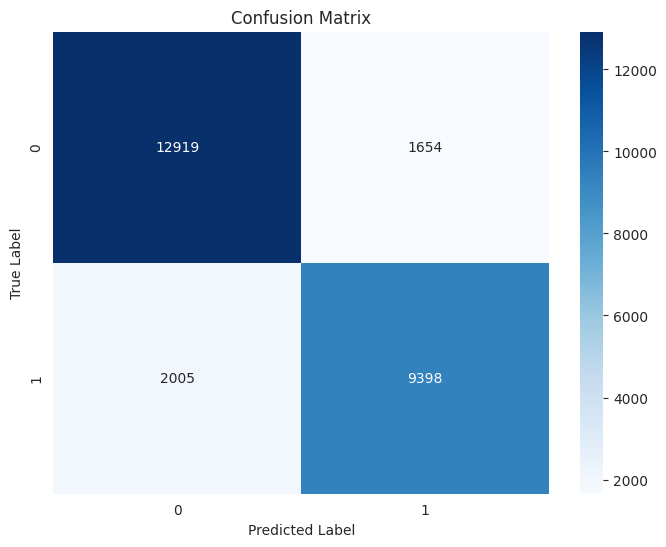

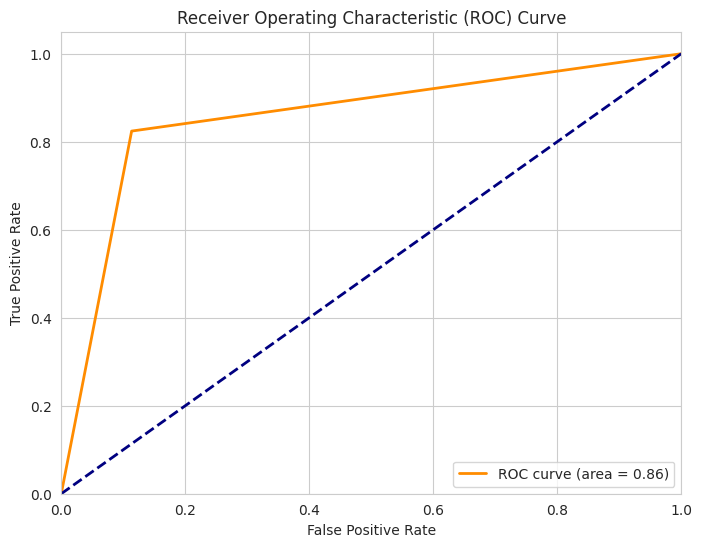

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')  # Save the ROC curve plot
plt.show()


# **MLP Classifier**

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the neural network model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Calculate performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Print performance metrics
print("MLP Classifier Performance Metrics:")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1-score:", f1_mlp)
print("Confusion Matrix:")
print(conf_matrix_mlp)


MLP Classifier Performance Metrics:
Accuracy: 0.9511857098860487
Precision: 0.9512773698872273
Recall: 0.9511857098860487
F1-score: 0.9511123623795483
Confusion Matrix:
[[14083   490]
 [  778 10625]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


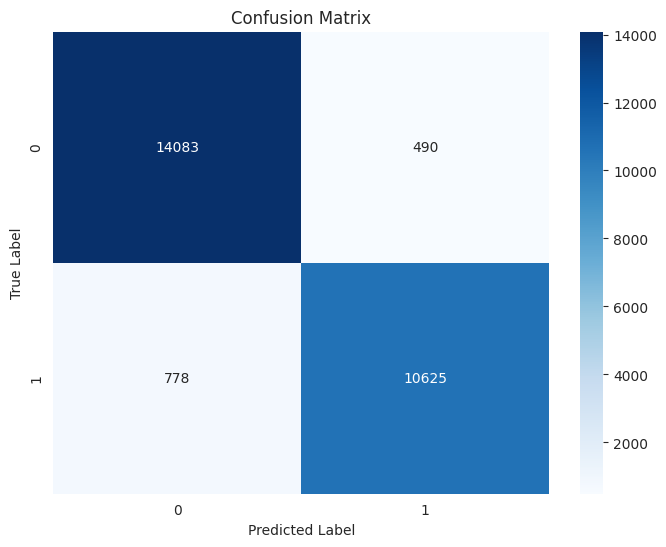

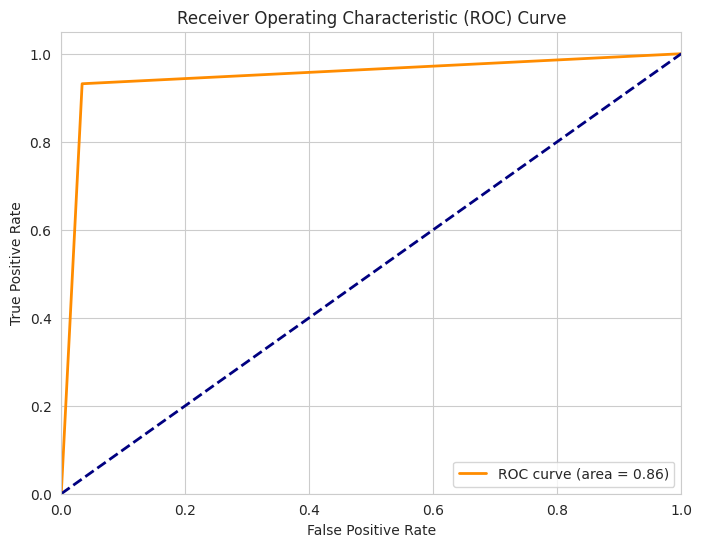

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_mlp.png')  # Save the confusion matrix plot
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve_mlp.png')  # Save the ROC curve plot
plt.show()


# **Gradient Booster Classifier**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print performance metrics
print("Gradient Boosting Classifier Performance Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print("Confusion Matrix:")
print(conf_matrix_gb)


Gradient Boosting Classifier Performance Metrics:
Accuracy: 0.9309747459193102
Precision: 0.9311067807468721
Recall: 0.9309747459193102
F1-score: 0.9308320619388929
Confusion Matrix:
[[13869   704]
 [ 1089 10314]]


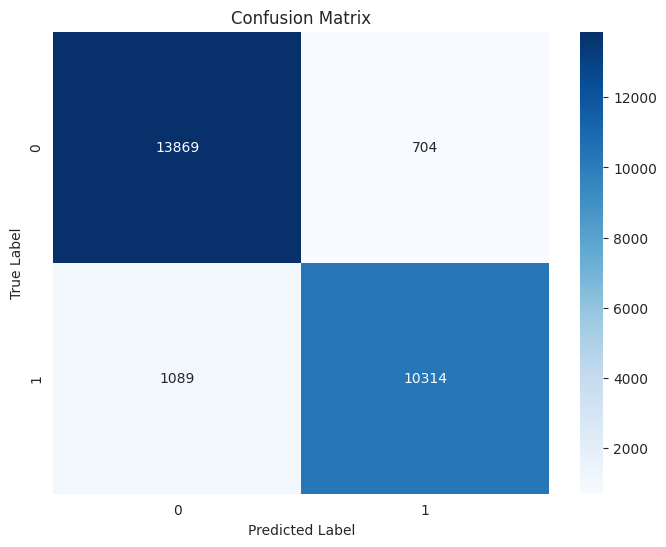

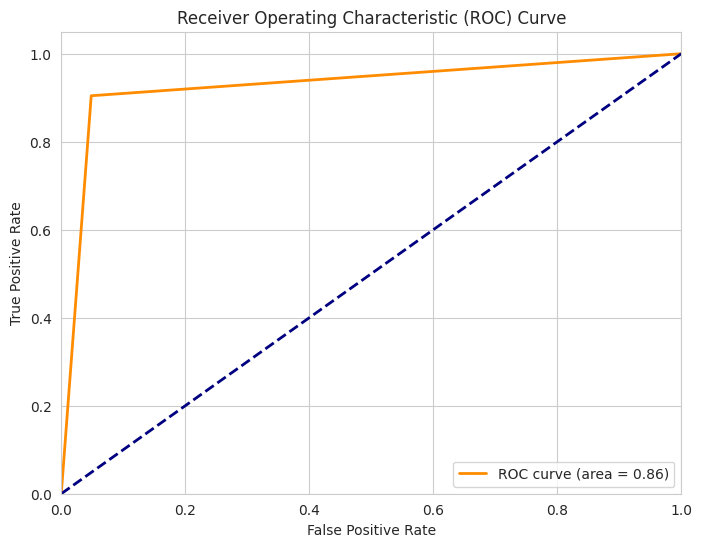

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_gb.png')  # Save the confusion matrix plot
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve_gb.png')  # Save the ROC curve plot
plt.show()
